In [3]:
cd CSV\ files


/Users/aratliff/Documents/Flatiron/Phase_1/Microsoft_Movie_Project/CSV files


In [252]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sn

In [206]:
df = pd.read_csv("combined_movie_data.csv")

In [207]:
df['movie_year'] = df.release_date_x.str[:4]
df.head()

,Unnamed: 0,titleId,start_year,genres,ordering,title,region,genre_ids,id_x,popularity,release_date_x,vote_average,vote_count,id_y,release_date_y,production_budget,domestic_gross,worldwide_gross,movie_year
0,0,tt0069049,2018.0,Drama,3.0,The Other Side of the Wind,US,"[35, 18]",299782,9.800,2018-11-02,7.0,64,NaN,NaN,NaN,NaN,NaN,2018
1,1,tt0112502,2017.0,"Horror,Thriller",3.0,Bigfoot,US,"[27, 878, 12]",117856,2.813,2012-06-30,2.9,26,NaN,NaN,NaN,NaN,NaN,2012
2,2,tt4503112,2018.0,"Action,Horror",3.0,Bigfoot,US,"[27, 878, 12]",117856,2.813,2012-06-30,2.9,26,NaN,NaN,NaN,NaN,NaN,2012
3,3,tt9181914,2018.0,"Animation,Family",5.0,Bigfoot,US,"[27, 878, 12]",117856,2.813,2012-06-30,2.9,26,NaN,NaN,NaN,NaN,NaN,2012
4,4,tt0192528,2018.0,Drama,1.0,Heaven & Hell,US,[18],567662,0.600,2018-11-06,7.5,2,NaN,NaN,NaN,NaN,NaN,2018


In [208]:
df.drop(df.loc[df['domestic_gross']=='$0'].index, inplace=True)

In [209]:
df1 = df.drop(['Unnamed: 0', 'start_year','titleId','worldwide_gross','genre_ids', 'id_x', 'worldwide_gross','id_y','ordering'], axis=1, inplace=False)

In [210]:
df1.head()

,genres,title,region,popularity,release_date_x,vote_average,vote_count,release_date_y,production_budget,domestic_gross,movie_year
0,Drama,The Other Side of the Wind,US,9.800,2018-11-02,7.0,64,NaN,NaN,NaN,2018
1,"Horror,Thriller",Bigfoot,US,2.813,2012-06-30,2.9,26,NaN,NaN,NaN,2012
2,"Action,Horror",Bigfoot,US,2.813,2012-06-30,2.9,26,NaN,NaN,NaN,2012
3,"Animation,Family",Bigfoot,US,2.813,2012-06-30,2.9,26,NaN,NaN,NaN,2012
4,Drama,Heaven & Hell,US,0.600,2018-11-06,7.5,2,NaN,NaN,NaN,2018


In [211]:
df1.isnull().sum()

genres                   0
title                    0
region               10202
popularity               0
release_date_x           0
vote_average             0
vote_count               0
release_date_y       23295
production_budget    23295
domestic_gross       23295
movie_year               0
dtype: int64

In [212]:
df2 = df1.dropna(axis = 0, subset = ['production_budget', 'domestic_gross'], inplace = False)
df2

,genres,title,region,popularity,release_date_x,vote_average,vote_count,release_date_y,production_budget,domestic_gross,movie_year
22,no genre,The Overnight,US,6.576,2015-06-19,6.0,200,"Jun 19, 2015","$200,000","$1,109,808",2015
23,"Comedy,Mystery",The Overnight,US,6.576,2015-06-19,6.0,200,"Jun 19, 2015","$200,000","$1,109,808",2015
26,"Adventure,Drama,Romance",On the Road,US,8.919,2012-12-21,5.6,518,"Mar 22, 2013","$25,000,000","$720,828",2012
27,Horror,Whiplash,US,6.298,2013-01-18,7.9,94,"Oct 10, 2014","$3,300,000","$13,092,006",2013
28,"Drama,Music",Whiplash,US,6.298,2013-01-18,7.9,94,"Oct 10, 2014","$3,300,000","$13,092,006",2013
...,...,...,...,...,...,...,...,...,...,...,...
26098,no genre,Man on Fire,NaN,1.790,2018-01-24,8.0,1,"Apr 23, 2004","$60,000,000","$77,906,816",2018
26200,no genre,Spawn,NaN,1.400,2018-04-13,10.0,1,"Jul 31, 1997","$40,000,000","$54,979,992",2018
26317,no genre,Enough,NaN,0.719,2018-03-22,8.7,3,"May 24, 2002","$38,000,000","$39,177,215",2018
26457,no genre,Undiscovered,NaN,0.600,2018-04-07,8.0,1,"Aug 26, 2005","$9,000,000","$1,069,318",2018


In [213]:
df2.shape

(2793, 11)

In [214]:
df2.isnull().sum()

genres                 0
title                  0
region               168
popularity             0
release_date_x         0
vote_average           0
vote_count             0
release_date_y         0
production_budget      0
domestic_gross         0
movie_year             0
dtype: int64

In [215]:
df2.dtypes

genres                object
title                 object
region                object
popularity           float64
release_date_x        object
vote_average         float64
vote_count             int64
release_date_y        object
production_budget     object
domestic_gross        object
movie_year            object
dtype: object

In [216]:
df2['domestic_gross'] = df2['domestic_gross'].str.replace('$', '')
df2['domestic_gross'] = df2['domestic_gross'].str.replace(',', '')

/Users/aratliff/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/aratliff/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [217]:
df2['production_budget'] = df2['production_budget'].str.replace('$', '')
df2['production_budget'] = df2['production_budget'].str.replace(',', '')

/Users/aratliff/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/aratliff/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [218]:
df2.dtypes

genres                object
title                 object
region                object
popularity           float64
release_date_x        object
vote_average         float64
vote_count             int64
release_date_y        object
production_budget     object
domestic_gross        object
movie_year            object
dtype: object

In [219]:
df2['domestic_gross'] = pd.to_numeric(df2['domestic_gross'],errors='coerce')
df2['production_budget'] = pd.to_numeric(df2['production_budget'],errors='coerce')
#df2.loc[:,'domestic_gross'] = pd.to_numeric(df2.loc['domestic_gross'],errors='coerce')

/Users/aratliff/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/aratliff/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [220]:
df2.dtypes

genres                object
title                 object
region                object
popularity           float64
release_date_x        object
vote_average         float64
vote_count             int64
release_date_y        object
production_budget      int64
domestic_gross         int64
movie_year            object
dtype: object

In [221]:
# df2['ROI'] = ((df2['domestic_gross'] - df2['production_budget'])/df['domestic_gross'])*100
df2["net"] = df2['domestic_gross'] - df2['production_budget'] 

/Users/aratliff/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [222]:
df2.head()

,genres,title,region,popularity,release_date_x,vote_average,vote_count,release_date_y,production_budget,domestic_gross,movie_year,net
22,no genre,The Overnight,US,6.576,2015-06-19,6.0,200,"Jun 19, 2015",200000,1109808,2015,909808
23,"Comedy,Mystery",The Overnight,US,6.576,2015-06-19,6.0,200,"Jun 19, 2015",200000,1109808,2015,909808
26,"Adventure,Drama,Romance",On the Road,US,8.919,2012-12-21,5.6,518,"Mar 22, 2013",25000000,720828,2012,-24279172
27,Horror,Whiplash,US,6.298,2013-01-18,7.9,94,"Oct 10, 2014",3300000,13092006,2013,9792006
28,"Drama,Music",Whiplash,US,6.298,2013-01-18,7.9,94,"Oct 10, 2014",3300000,13092006,2013,9792006


In [223]:
df2.drop(df2.loc[df2['genres']=='no genre'].index, inplace=True)

/Users/aratliff/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [224]:
df2.head()

,genres,title,region,popularity,release_date_x,vote_average,vote_count,release_date_y,production_budget,domestic_gross,movie_year,net
23,"Comedy,Mystery",The Overnight,US,6.576,2015-06-19,6.0,200,"Jun 19, 2015",200000,1109808,2015,909808
26,"Adventure,Drama,Romance",On the Road,US,8.919,2012-12-21,5.6,518,"Mar 22, 2013",25000000,720828,2012,-24279172
27,Horror,Whiplash,US,6.298,2013-01-18,7.9,94,"Oct 10, 2014",3300000,13092006,2013,9792006
28,"Drama,Music",Whiplash,US,6.298,2013-01-18,7.9,94,"Oct 10, 2014",3300000,13092006,2013,9792006
29,Horror,Whiplash,US,28.784,2014-10-10,8.4,7908,"Oct 10, 2014",3300000,13092006,2014,9792006


In [225]:
df2['ROI'] = (df2['net']/df2['domestic_gross'])*100

/Users/aratliff/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [226]:
df2.head()

,genres,title,region,popularity,release_date_x,vote_average,vote_count,release_date_y,production_budget,domestic_gross,movie_year,net,ROI
23,"Comedy,Mystery",The Overnight,US,6.576,2015-06-19,6.0,200,"Jun 19, 2015",200000,1109808,2015,909808,81.978865
26,"Adventure,Drama,Romance",On the Road,US,8.919,2012-12-21,5.6,518,"Mar 22, 2013",25000000,720828,2012,-24279172,-3368.233753
27,Horror,Whiplash,US,6.298,2013-01-18,7.9,94,"Oct 10, 2014",3300000,13092006,2013,9792006,74.793779
28,"Drama,Music",Whiplash,US,6.298,2013-01-18,7.9,94,"Oct 10, 2014",3300000,13092006,2013,9792006,74.793779
29,Horror,Whiplash,US,28.784,2014-10-10,8.4,7908,"Oct 10, 2014",3300000,13092006,2014,9792006,74.793779


In [227]:
df2['ROI'].apply(np.ceil)

23         82.0
26      -3368.0
27         75.0
28         75.0
29         75.0
          ...  
15926    -475.0
16018      78.0
16202      22.0
16260      86.0
16261      86.0
Name: ROI, Length: 2620, dtype: float64

In [228]:
df2

,genres,title,region,popularity,release_date_x,vote_average,vote_count,release_date_y,production_budget,domestic_gross,movie_year,net,ROI
23,"Comedy,Mystery",The Overnight,US,6.576,2015-06-19,6.0,200,"Jun 19, 2015",200000,1109808,2015,909808,81.978865
26,"Adventure,Drama,Romance",On the Road,US,8.919,2012-12-21,5.6,518,"Mar 22, 2013",25000000,720828,2012,-24279172,-3368.233753
27,Horror,Whiplash,US,6.298,2013-01-18,7.9,94,"Oct 10, 2014",3300000,13092006,2013,9792006,74.793779
28,"Drama,Music",Whiplash,US,6.298,2013-01-18,7.9,94,"Oct 10, 2014",3300000,13092006,2013,9792006,74.793779
29,Horror,Whiplash,US,28.784,2014-10-10,8.4,7908,"Oct 10, 2014",3300000,13092006,2014,9792006,74.793779
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15926,Documentary,Teeth,US,0.600,2015-09-26,5.0,1,"Jan 18, 2008",2000000,347578,2015,-1652422,-475.410411
16018,"Drama,Horror,Mystery",Hereditary,US,26.185,2018-06-08,7.0,2491,"Jun 8, 2018",10000000,44069456,2018,34069456,77.308547
16202,Documentary,Fahrenheit 11/9,US,10.003,2018-09-10,7.1,142,"Sep 21, 2018",5000000,6352306,2018,1352306,21.288427
16260,"Comedy,Drama,Family",Monster,US,0.600,2010-01-01,5.0,1,"Dec 24, 2003",5000000,34469210,2010,29469210,85.494301


In [229]:
final_df = df2.drop_duplicates(subset=['title'])

In [230]:
final_df.tail()

,genres,title,region,popularity,release_date_x,vote_average,vote_count,release_date_y,production_budget,domestic_gross,movie_year,net,ROI
15870,"Action,Crime,Drama",War,US,0.600,2017-02-26,6.0,1,"Aug 24, 2007",25000000,22486409,2017,-2513591,-11.178268
15923,Drama,Teeth,US,1.000,2015-01-25,7.6,5,"Jan 18, 2008",2000000,347578,2015,-1652422,-475.410411
16018,"Drama,Horror,Mystery",Hereditary,US,26.185,2018-06-08,7.0,2491,"Jun 8, 2018",10000000,44069456,2018,34069456,77.308547
16202,Documentary,Fahrenheit 11/9,US,10.003,2018-09-10,7.1,142,"Sep 21, 2018",5000000,6352306,2018,1352306,21.288427
16260,"Comedy,Drama,Family",Monster,US,0.600,2010-01-01,5.0,1,"Dec 24, 2003",5000000,34469210,2010,29469210,85.494301


In [231]:
final_df.drop(['release_date_x','movie_year'], axis=1, inplace=True)

/Users/aratliff/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [232]:
final_df.head()

,genres,title,region,popularity,vote_average,vote_count,release_date_y,production_budget,domestic_gross,net,ROI
23,"Comedy,Mystery",The Overnight,US,6.576,6.0,200,"Jun 19, 2015",200000,1109808,909808,81.978865
26,"Adventure,Drama,Romance",On the Road,US,8.919,5.6,518,"Mar 22, 2013",25000000,720828,-24279172,-3368.233753
27,Horror,Whiplash,US,6.298,7.9,94,"Oct 10, 2014",3300000,13092006,9792006,74.793779
31,"Adventure,Comedy,Drama",The Secret Life of Walter Mitty,US,10.743,7.1,4859,"Dec 25, 2013",91000000,58236838,-32763162,-56.258484
34,"Action,Crime,Drama",A Walk Among the Tombstones,US,19.373,6.3,1685,"Sep 19, 2014",28000000,26017685,-1982315,-7.619106


In [233]:
final_df.dtypes

genres                object
title                 object
region                object
popularity           float64
vote_average         float64
vote_count             int64
release_date_y        object
production_budget      int64
domestic_gross         int64
net                    int64
ROI                  float64
dtype: object

In [234]:
final_df['release_date'] = final_df.release_date_y.apply(lambda x: pd.to_datetime(x).strftime('%m%d%Y'))

/Users/aratliff/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [235]:
final_df.head()

,genres,title,region,popularity,vote_average,vote_count,release_date_y,production_budget,domestic_gross,net,ROI,release_date
23,"Comedy,Mystery",The Overnight,US,6.576,6.0,200,"Jun 19, 2015",200000,1109808,909808,81.978865,06192015
26,"Adventure,Drama,Romance",On the Road,US,8.919,5.6,518,"Mar 22, 2013",25000000,720828,-24279172,-3368.233753,03222013
27,Horror,Whiplash,US,6.298,7.9,94,"Oct 10, 2014",3300000,13092006,9792006,74.793779,10102014
31,"Adventure,Comedy,Drama",The Secret Life of Walter Mitty,US,10.743,7.1,4859,"Dec 25, 2013",91000000,58236838,-32763162,-56.258484,12252013
34,"Action,Crime,Drama",A Walk Among the Tombstones,US,19.373,6.3,1685,"Sep 19, 2014",28000000,26017685,-1982315,-7.619106,09192014


In [236]:
final_df.dtypes

genres                object
title                 object
region                object
popularity           float64
vote_average         float64
vote_count             int64
release_date_y        object
production_budget      int64
domestic_gross         int64
net                    int64
ROI                  float64
release_date          object
dtype: object

In [237]:
final_df.dtypes

genres                object
title                 object
region                object
popularity           float64
vote_average         float64
vote_count             int64
release_date_y        object
production_budget      int64
domestic_gross         int64
net                    int64
ROI                  float64
release_date          object
dtype: object

In [238]:

final_df['release_date'] = pd.to_datetime(final_df['release_date'], format='%m%d%Y')

/Users/aratliff/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [239]:
final_df.dtypes

genres                       object
title                        object
region                       object
popularity                  float64
vote_average                float64
vote_count                    int64
release_date_y               object
production_budget             int64
domestic_gross                int64
net                           int64
ROI                         float64
release_date         datetime64[ns]
dtype: object

In [240]:

final_df = final_df.drop(['release_date_y'], axis=1, inplace=False)

In [241]:
final_df.head()

,genres,title,region,popularity,vote_average,vote_count,production_budget,domestic_gross,net,ROI,release_date
23,"Comedy,Mystery",The Overnight,US,6.576,6.0,200,200000,1109808,909808,81.978865,2015-06-19
26,"Adventure,Drama,Romance",On the Road,US,8.919,5.6,518,25000000,720828,-24279172,-3368.233753,2013-03-22
27,Horror,Whiplash,US,6.298,7.9,94,3300000,13092006,9792006,74.793779,2014-10-10
31,"Adventure,Comedy,Drama",The Secret Life of Walter Mitty,US,10.743,7.1,4859,91000000,58236838,-32763162,-56.258484,2013-12-25
34,"Action,Crime,Drama",A Walk Among the Tombstones,US,19.373,6.3,1685,28000000,26017685,-1982315,-7.619106,2014-09-19


In [242]:
#Ratings and Production Budget

In [255]:
final_df.describe()

,popularity,vote_average,vote_count,production_budget,domestic_gross,net,ROI
count,1481.000000,1481.000000,1481.000000,1.481000e+03,1.481000e+03,1.481000e+03,1.481000e+03
mean,12.042804,6.278123,1973.209993,4.449536e+07,5.715617e+07,1.266081e+07,-6.907214e+03
std,8.123598,0.992251,2797.992535,5.436434e+07,8.434149e+07,5.913659e+07,9.984564e+04
min,0.600000,0.000000,1.000000,9.000000e+03,5.280000e+02,-2.019413e+08,-3.267874e+06
25%,7.510000,5.800000,245.000000,9.000000e+06,5.790894e+06,-1.081181e+07,-1.487813e+02
50%,10.613000,6.300000,918.000000,2.500000e+07,2.884869e+07,-3.636800e+04,-1.213987e+00
75%,15.351000,6.900000,2494.000000,5.500000e+07,6.774533e+07,2.305991e+07,5.192323e+01
max,80.773000,10.000000,22186.000000,4.106000e+08,7.000596e+08,5.000596e+08,9.956072e+01


In [256]:
final_df['production_budget'].median()

25000000.0

In [257]:
final_df['popularity'].mean()

12.042804186360566

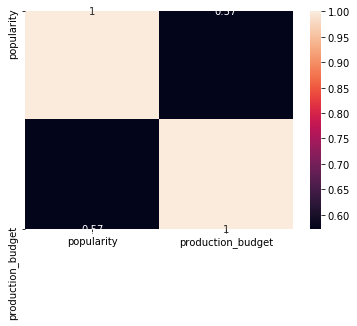

In [258]:
final_df_corr = pd.DataFrame(final_df, columns=['popularity','production_budget'])

corrMatrix = final_df_corr.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

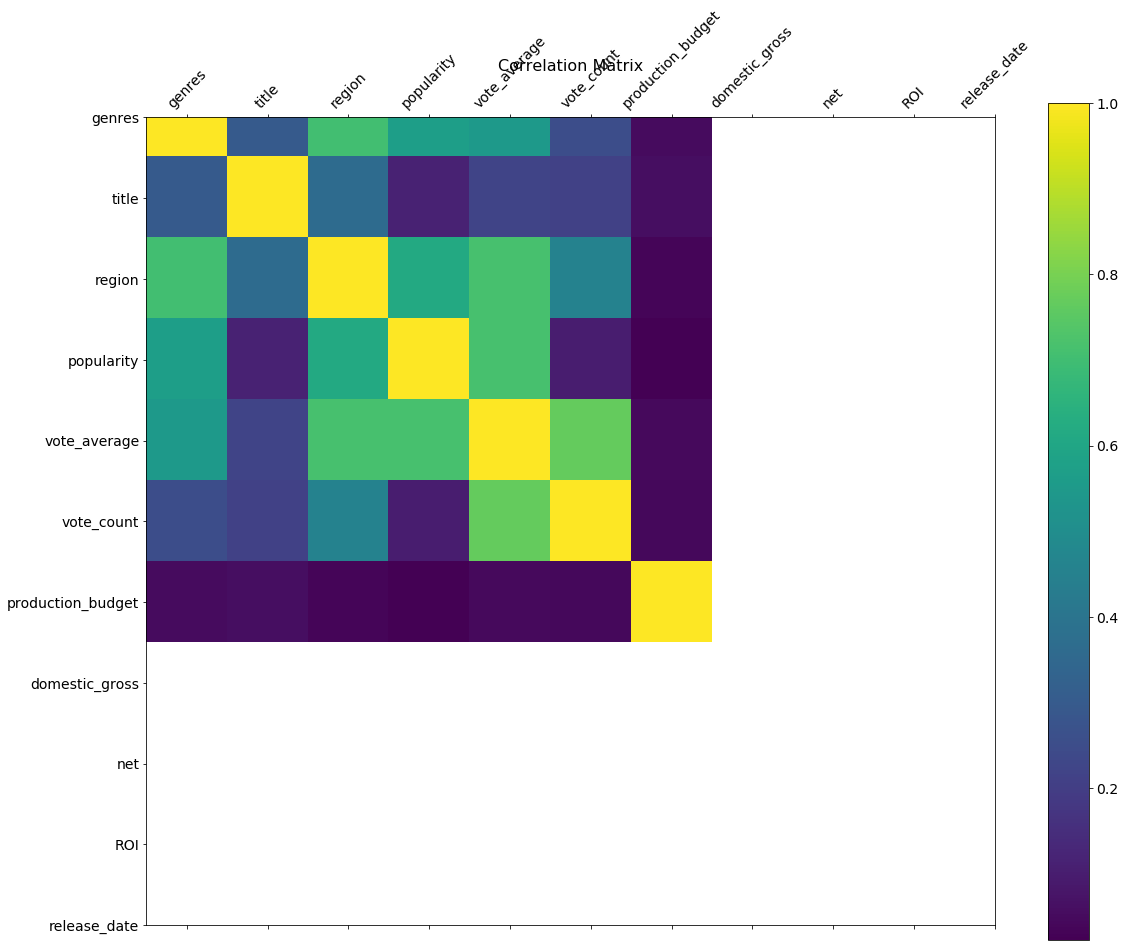

In [263]:
f = plt.figure(figsize=(19, 15))
plt.matshow(final_df.corr(), fignum=f.number)
plt.xticks(range(final_df.shape[1]), final_df.columns, fontsize=14, rotation=45)
plt.yticks(range(final_df.shape[1]), final_df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [246]:
#Genre and Popularity

In [247]:
final_df['popularity'].median()

10.613

In [248]:
#Time of Year and Net

In [249]:
final_df['net'].median()

-36368.0

In [250]:
#Genre and ROI

In [251]:
final_df['ROI'].median()

-1.2139865815123516